In [225]:
%matplotlib inline
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [226]:
df = pd.read_csv('ron.csv')

In [227]:
df.dtypes

Season              object
Competition         object
Matchday            object
Date                object
Venue               object
Club                object
Opponent            object
Result              object
Playing_Position    object
Minute              object
At_score            object
Type                object
Goal_assist         object
dtype: object

In [228]:
np.sum(df.isnull())

Season                0
Competition           0
Matchday              0
Date                  0
Venue                 0
Club                  0
Opponent              0
Result                0
Playing_Position     58
Minute                0
At_score              0
Type                 15
Goal_assist         246
dtype: int64

In [229]:
df.columns

Index(['Season', 'Competition', 'Matchday', 'Date', 'Venue', 'Club',
       'Opponent', 'Result', 'Playing_Position', 'Minute', 'At_score', 'Type',
       'Goal_assist'],
      dtype='object')

In [230]:
df.shape

(710, 13)

In [231]:
df.groupby(by=['Goal_assist']).count().sort_values(by='Season', ascending=False)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type
Goal_assist,,,,,,,,,,,,
Karim Benzema,44,44,44,44,44,44,44,44,44,44,44,44
Gareth Bale,29,29,29,29,29,29,29,29,29,29,29,29
Mesut Ozil,26,26,26,26,26,26,26,26,26,26,26,26
Marcelo,23,23,23,23,23,23,23,23,23,23,23,23
Angel Di Maria,22,22,22,22,22,22,22,22,21,22,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...
Merih Demiral,1,1,1,1,1,1,1,1,1,1,1,1
Borja Mayoral,1,1,1,1,1,1,1,1,1,1,1,1
Nacho Fernandez,1,1,1,1,1,1,1,1,1,1,1,1


In [232]:
df.Type.unique()

array(['Solo run', 'Header', 'Right-footed shot', 'Left-footed shot', nan,
       'Direct free kick', 'Tap-in', 'Penalty', 'Penalty rebound',
       'Long distance kick', 'Counter attack goal',
       'Deflected shot on goal'], dtype=object)

In [233]:
goal_types = df.groupby(by=['Type']).count().sort_values(by='Season', ascending=False)
goal_types

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Goal_assist
Type,,,,,,,,,,,,
Right-footed shot,253,253,253,253,253,253,253,253,233,253,253,223
Penalty,132,132,132,132,132,132,132,132,127,132,132,1
Left-footed shot,113,113,113,113,113,113,113,113,106,113,113,98
Header,112,112,112,112,112,112,112,112,105,112,112,111
Direct free kick,49,49,49,49,49,49,49,49,43,49,49,0
Tap-in,14,14,14,14,14,14,14,14,13,14,14,5
Long distance kick,9,9,9,9,9,9,9,9,9,9,9,7
Counter attack goal,6,6,6,6,6,6,6,6,5,6,6,6
Penalty rebound,3,3,3,3,3,3,3,3,2,3,3,1


In [234]:
def rgb_colors(arg: int):
    counter = 0
    result = []
    while counter < arg:
        random_color = (
            round(random.random(), 1),
            round(random.random(), 1),
            round(random.random(), 1),
        )
        result.append(random_color)
        counter += 1
    return result

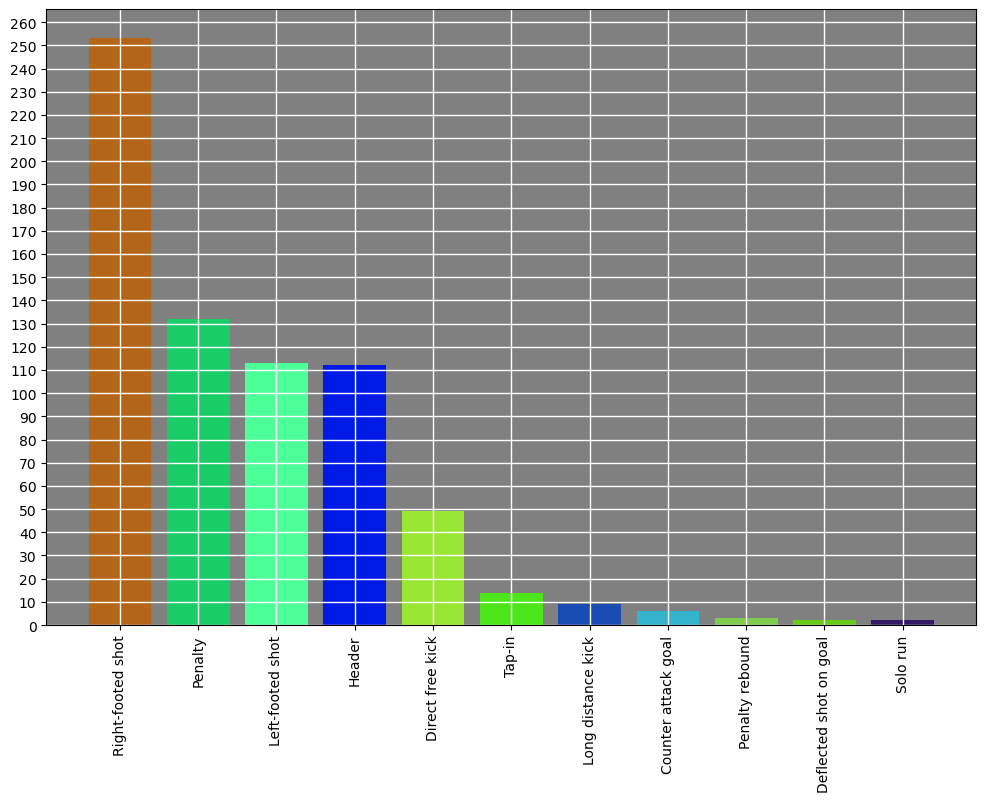

In [235]:
plt.figure(figsize=(12, 8))
ax = plt.axes()
ax.set_facecolor('grey')
plt.bar(goal_types.index, goal_types.Season, color=rgb_colors(len(goal_types.Season)))
plt.grid(color='w', linestyle='-', linewidth=1)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 261, step=10))
plt.show()

In [236]:
plt.close('all')

In [237]:
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
1,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN


In [238]:
# c = np.array([1 for i in range(len(df.Season))])
c = np.ones(len(df.Season), dtype=int)

In [239]:
d = pd.DataFrame(columns=['goal'], data=pd.Series(c), dtype=int)

In [240]:
df.insert(loc=13, column='g', value=c)

In [241]:
df.loc[df.Season == 'Dec-13', 'Season'] = '12/13'

In [242]:
df

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist,g
0,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN,1
1,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge,1
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins,1
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates,1
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,22/23,Saudi Pro League,16,2/9/23,A,Al-Nassr FC,Al-Wehda FC,0:4,CF,61,0:4,Right-footed shot,NaN,1
706,22/23,Saudi Pro League,18,2/25/23,A,Al-Nassr FC,Damac FC,0:3,CF,18,0:1,Penalty,\t,1
707,22/23,Saudi Pro League,18,2/25/23,A,Al-Nassr FC,Damac FC,0:3,CF,23,0:2,Left-footed shot,Sultan Al-Ghannam,1
708,22/23,Saudi Pro League,18,2/25/23,A,Al-Nassr FC,Damac FC,0:3,CF,44,0:3,Counter attack goal,Ayman Yahya,1


In [243]:
gs = df.groupby(by='Season').count()

In [246]:
gs.g

Season
02/03     5
03/04     6
04/05     9
05/06    12
06/07    23
07/08    42
08/09    26
09/10    33
10/11    53
11/12    60
12/13    55
13/14    51
14/15    61
15/16    51
16/17    42
17/18    44
18/19    28
19/20    37
20/21    36
21/22    24
22/23    12
Name: g, dtype: int64

In [254]:
gs = pd.DataFrame(data=gs.g.values, columns=['goals'], index=gs.index)

In [255]:
gs

,goals
Season,
02/03,5
03/04,6
04/05,9
05/06,12
06/07,23
07/08,42
08/09,26
09/10,33
10/11,53


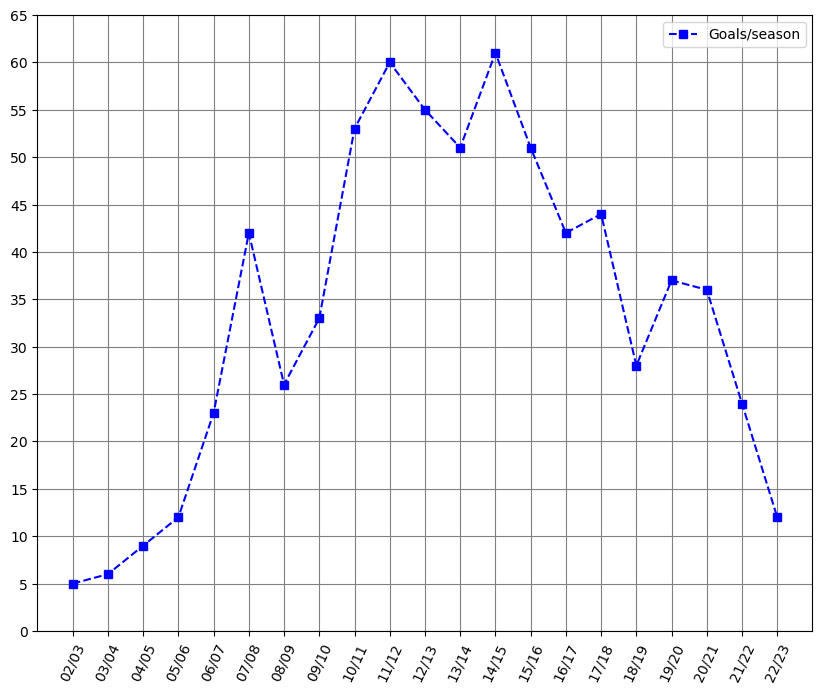

In [284]:
plt.figure(figsize=(10, 8))
ax = plt.axes()
# ax.set_facecolor('green')
plt.grid(color='grey')
plt.plot(gs.index, gs.goals, 'b--s', label='Goals/season')
plt.xticks(rotation=65)
plt.yticks(np.arange(0, 66, step=5))
plt.legend()
plt.show()

In [287]:
gs.sort_values(by='goals', ascending=False).head(3)

,goals
Season,
14/15,61
11/12,60
12/13,55
